In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Phase 1

In [304]:

BASE_DIR = Path("../") 
RAW_DATA_DIR = BASE_DIR / "data" / "raw"
PROCESSED_DATA_DIR = BASE_DIR / "data" / "processed"
CUSTOMERS_CSV = RAW_DATA_DIR / "customers.csv"
PRODUCTS_CSV = RAW_DATA_DIR / "products.csv"
SALES_CSV = RAW_DATA_DIR / "sales_transactions.csv"

In [305]:
class Repository:
    def __init__(self, raw_data_dir, processed_data_dir):
        self.raw_data_dir = raw_data_dir
        self.processed_data_dir = processed_data_dir
        
    def load_customers(self):
        return pd.read_csv(self.raw_data_dir / "customers.csv")

    def load_products(self):
        return pd.read_csv(self.raw_data_dir / "products.csv")

    def load_sales(self):
        return pd.read_csv(self.raw_data_dir / "sales_transactions.csv")
    
    def save_customers(self, df):
        df.to_csv(self.processed_data_dir / "cleaned_customers.csv", index=False)

    def save_products(self, df):
        df.to_csv(self.processed_data_dir / "cleaned_products.csv", index=False)

    def save_sales(self, df):
        df.to_csv(self.processed_data_dir / "cleaned_sales_transactions.csv", index=False)

In [306]:
repo=Repository(RAW_DATA_DIR,PROCESSED_DATA_DIR)
customer=repo.load_customers()
product=repo.load_products()
transactions=repo.load_sales()

In [307]:
customer.head()


,CustomerID,Name,Region,Signup_Date
0,CUST-001,Customer_1,east,2020-01-05
1,CUST-002,Customer_2,East,2020-01-12
2,CUST-003,Customer_3,West,2020-01-19
3,CUST-004,Customer_4,midwest,2020-01-26
4,CUST-005,Customer_5,midwest,2020-02-02


In [308]:
customer.describe()

,CustomerID,Name,Region,Signup_Date
count,105,105,105,105
unique,100,100,10,100
top,CUST-008,Customer_8,South,2020-02-23
freq,2,2,23,2


In [309]:
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   105 non-null    str  
 1   Name         105 non-null    str  
 2   Region       105 non-null    str  
 3   Signup_Date  105 non-null    str  
dtypes: str(4)
memory usage: 3.4 KB


In [310]:
# sign up date should be DateTime Not String
customer['Signup_Date']=pd.to_datetime(customer['Signup_Date'], errors='coerce')

In [311]:
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   105 non-null    str           
 1   Name         105 non-null    str           
 2   Region       105 non-null    str           
 3   Signup_Date  105 non-null    datetime64[us]
dtypes: datetime64[us](1), str(3)
memory usage: 3.4 KB


In [312]:
product.describe()

,Price
count,20.000000
mean,283.633000
std,121.485899
min,63.690000
25%,205.180000
50%,303.745000
75%,362.327500
max,464.980000


In [313]:
product.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductID  20 non-null     str    
 1   Category   20 non-null     str    
 2   Price      20 non-null     float64
dtypes: float64(1), str(2)
memory usage: 612.0 bytes


In [314]:
transactions.describe()

,TransactionID,Quantity,Discount
count,1000.000000,1000.000000,1000.000000
mean,10500.500000,9.882000,0.085800
std,288.819436,70.281801,0.072998
min,10001.000000,-9.000000,0.000000
25%,10250.750000,3.000000,0.050000
50%,10500.500000,5.000000,0.050000
75%,10750.250000,7.000000,0.100000
max,11000.000000,1000.000000,0.200000


In [315]:
transactions.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1000 non-null   int64  
 1   CustomerID     1000 non-null   str    
 2   ProductID      1000 non-null   str    
 3   Date           995 non-null    str    
 4   Quantity       1000 non-null   int64  
 5   Discount       1000 non-null   float64
 6   Total_Amount   971 non-null    str    
dtypes: float64(1), int64(2), str(4)
memory usage: 54.8 KB


# Problems with Data (Transactions)
- (Incorrect Data Types )
    - Total amount is str
    - Transaction Date is str
- There are multible leading and trailing spaces
- missing values in Date and total amount 
    - 5 in Dates
    - 29 in Total_Amount
- 42 Check_Receipt in Total_Amount
- 10 Invalid_Date exists
- Some Total_Amount got EUR and others doesn't
- Quantity values
    - Check for negative quantities (verify with df[df['Quantity'] < 0])
- there are outliers in the Quantity column

### Data Cleaning

In [316]:
# clean the product table (remove leading and trailing spaces)
product['Category'] = product['Category'].str.strip().str.title()

# clean the customer table (remove leading and trailing spaces)
customer['Region'] = customer['Region'].str.strip().str.title()
customer['Name'] = customer['Name'].str.strip().str.title()

# convert the Signup_Date into DateTime (done in a previous sell)
customer['Signup_Date'] = pd.to_datetime(customer['Signup_Date'], errors='coerce')

### handling missing values for Date ?

In [317]:
transactions['Quantity'].skew()
# since > 1, then it's skewed
# since there is outlier or skewness in the dataset we will fill the missing values with median not mean

np.float64(14.021126545817783)

In [318]:
# Converting the Date column in transactions to DateTime
transactions['Date']=pd.to_datetime(transactions['Date'], errors='coerce')

# Remove the EUR 
transactions['Total_Amount'] = (
    transactions['Total_Amount']
    .astype(str)          
    .str.replace('EUR', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Converting the Total_Amount column in transactions to Numeric
transactions['Total_Amount'] = pd.to_numeric(transactions['Total_Amount'], errors='coerce')


In [319]:
#Remove negative Quantity
transactions = transactions[transactions['Quantity'] >= 0]

In [320]:

# Drop rows where Date is NaT (including "Invalid_Date")
transactions = transactions.dropna(subset=['Date'])

In [321]:
transactions.info()

<class 'pandas.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  970 non-null    int64         
 1   CustomerID     970 non-null    str           
 2   ProductID      970 non-null    str           
 3   Date           970 non-null    datetime64[us]
 4   Quantity       970 non-null    int64         
 5   Discount       970 non-null    float64       
 6   Total_Amount   734 non-null    float64       
dtypes: datetime64[us](1), float64(2), int64(2), str(2)
memory usage: 60.6 KB


In [322]:
# Save Processed Data
repo.save_customers(customer)
repo.save_products(product)
repo.save_sales(transactions)

In [323]:
# Phase 2

In [324]:
# Merge sales with customers
sales_customers = transactions.merge(customer, on='CustomerID', how='left')

# Merge the result with products
full_data = sales_customers.merge(product, on='ProductID', how='left')

print(full_data.head())
print(full_data.info())

   TransactionID CustomerID ProductID                Date  Quantity  Discount  \
0          10001   CUST-011  PROD-017 2023-01-01 00:00:00         1      0.10   
1          10001   CUST-011  PROD-017 2023-01-01 00:00:00         1      0.10   
2          10003   CUST-091  PROD-017 2023-01-01 02:00:00         7      0.05   
3          10003   CUST-091  PROD-017 2023-01-01 02:00:00         7      0.05   
4          10004   CUST-008  PROD-006 2023-01-01 03:00:00         1      0.00   

   Total_Amount         Name Region Signup_Date   Category   Price  
0           NaN  Customer_11  South  2020-03-15  Furniture  403.27  
1           NaN  Customer_11  South  2020-03-15  Furniture  403.27  
2           NaN  Customer_91  North  2021-09-26  Furniture  403.27  
3           NaN  Customer_91  North  2021-09-26  Furniture  403.27  
4         148.0   Customer_8   West  2020-02-23  Furniture  148.00  
<class 'pandas.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 12 columns):
 # 

# Phase 3

In [325]:

#Phase 3
full_data['Calculated_Revenue'] = full_data['Quantity'] * full_data['Price'] * (1 - full_data['Discount'])
full_data['Revenue_Error'] = full_data['Calculated_Revenue'] - full_data['Total_Amount']
print(full_data[['Total_Amount', 'Calculated_Revenue', 'Revenue_Error']].head(10))


   Total_Amount  Calculated_Revenue  Revenue_Error
0           NaN            362.9430            NaN
1           NaN            362.9430            NaN
2           NaN           2681.7455            NaN
3           NaN           2681.7455            NaN
4        148.00            148.0000          0.000
5        148.00            148.0000          0.000
6        856.62            856.6150         -0.005
7         57.32             57.3210          0.001
8       1088.83           1088.8290         -0.001
9        577.09            577.0880         -0.002


In [326]:
full_data[['Quantity', 'Price', 'Discount', 'Total_Amount', 'Calculated_Revenue']].head(10)

,Quantity,Price,Discount,Total_Amount,Calculated_Revenue
0,1,403.27,0.10,NaN,362.9430
1,1,403.27,0.10,NaN,362.9430
2,7,403.27,0.05,NaN,2681.7455
3,7,403.27,0.05,NaN,2681.7455
4,1,148.00,0.00,148.00,148.0000
5,1,148.00,0.00,148.00,148.0000
6,5,180.34,0.05,856.62,856.6150
7,1,63.69,0.10,57.32,57.3210
8,3,403.27,0.10,1088.83,1088.8290
9,4,180.34,0.20,577.09,577.0880


In [327]:
full_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       1021 non-null   int64         
 1   CustomerID          1021 non-null   str           
 2   ProductID           1021 non-null   str           
 3   Date                1021 non-null   datetime64[us]
 4   Quantity            1021 non-null   int64         
 5   Discount            1021 non-null   float64       
 6   Total_Amount        773 non-null    float64       
 7   Name                1001 non-null   str           
 8   Region              1001 non-null   str           
 9   Signup_Date         1001 non-null   datetime64[us]
 10  Category            992 non-null    str           
 11  Price               992 non-null    float64       
 12  Calculated_Revenue  992 non-null    float64       
 13  Revenue_Error       773 non-null    float64       
dtypes: 

In [328]:
# calculated revenue
full_data['Calculated_Revenue'] = full_data['Quantity'] * full_data['Price'] * (1 - full_data['Discount'])

# compare with the total amount (original dirty )
full_data['Revenue_Difference'] = full_data['Total_Amount'] - full_data['Calculated_Revenue']
print(full_data[['Total_Amount','Calculated_Revenue', 'Revenue_Difference']].head(10))


   Total_Amount  Calculated_Revenue  Revenue_Difference
0           NaN            362.9430                 NaN
1           NaN            362.9430                 NaN
2           NaN           2681.7455                 NaN
3           NaN           2681.7455                 NaN
4        148.00            148.0000               0.000
5        148.00            148.0000               0.000
6        856.62            856.6150               0.005
7         57.32             57.3210              -0.001
8       1088.83           1088.8290               0.001
9        577.09            577.0880               0.002


In [329]:
#fill total amount with the calculated amount
full_data['Total_Amount'] = full_data['Total_Amount'].fillna(full_data['Calculated_Revenue'])


# Show full data after filling Total_Amount
full_data[['CustomerID','ProductID','Quantity','Price','Discount','Total_Amount','Calculated_Revenue']].head(20)

# Drop rows with missing customer/product
full_data['Missing_Customer'] = full_data['Name'].isna()
full_data['Missing_Product'] = full_data['Category'].isna()
full_data = full_data[~full_data['Missing_Customer'] & ~full_data['Missing_Product']]

In [330]:
# set seaboarn style
sns.set_style("whitegrid")

In [331]:
print(full_data[['Missing_Customer', 'Missing_Product']].sum())
full_data.info()

Missing_Customer    0
Missing_Product     0
dtype: int64
<class 'pandas.DataFrame'>
Index: 973 entries, 0 to 1020
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       973 non-null    int64         
 1   CustomerID          973 non-null    str           
 2   ProductID           973 non-null    str           
 3   Date                973 non-null    datetime64[us]
 4   Quantity            973 non-null    int64         
 5   Discount            973 non-null    float64       
 6   Total_Amount        973 non-null    float64       
 7   Name                973 non-null    str           
 8   Region              973 non-null    str           
 9   Signup_Date         973 non-null    datetime64[us]
 10  Category            973 non-null    str           
 11  Price               973 non-null    float64       
 12  Calculated_Revenue  973 non-null    float64       
 13  Revenue_

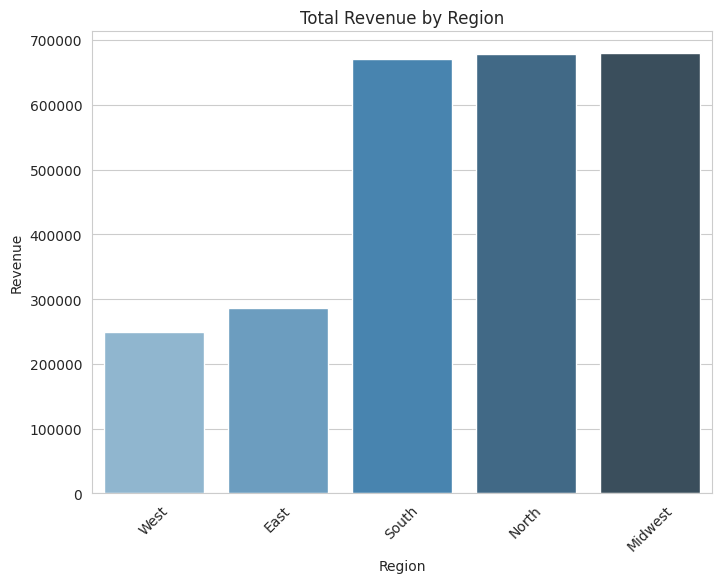

In [332]:
revenue_by_region = (
    full_data
    .groupby('Region')['Calculated_Revenue']
    .sum()
    .sort_values()
    .reset_index()
)
plt.figure(figsize=(8, 6))

sns.barplot(
    data=revenue_by_region,
    x='Region',
    y='Calculated_Revenue',
    hue='Region',        
    palette='Blues_d',
    legend=False        
)

plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

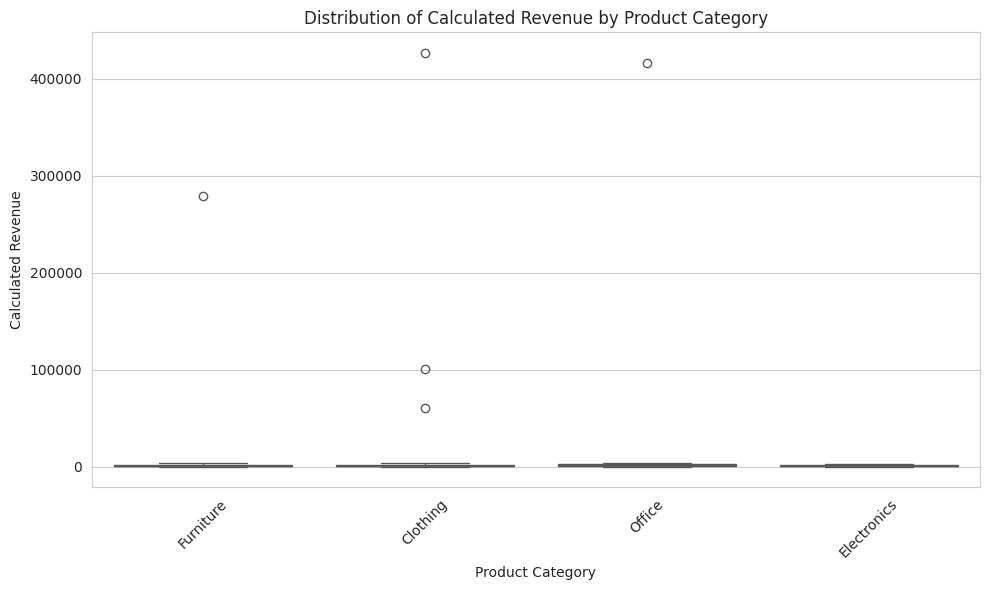

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=full_data,
    x='Category',
    y='Calculated_Revenue',
    hue='Category',
    palette='Set2',
    legend=False
)

plt.title('Distribution of Calculated Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Calculated Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

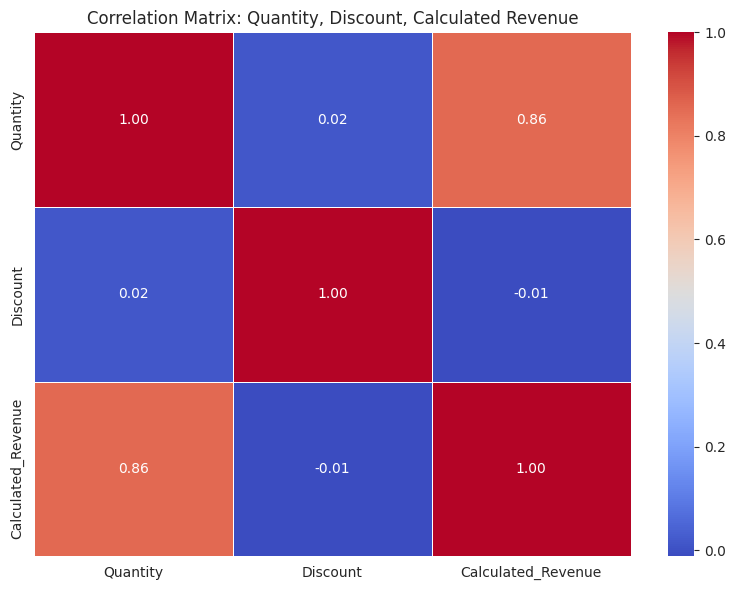

In [ ]:
corr_matrix = full_data[
    ['Quantity', 'Discount', 'Calculated_Revenue']
].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Matrix: Quantity, Discount, Calculated Revenue')
plt.tight_layout()
plt.show()


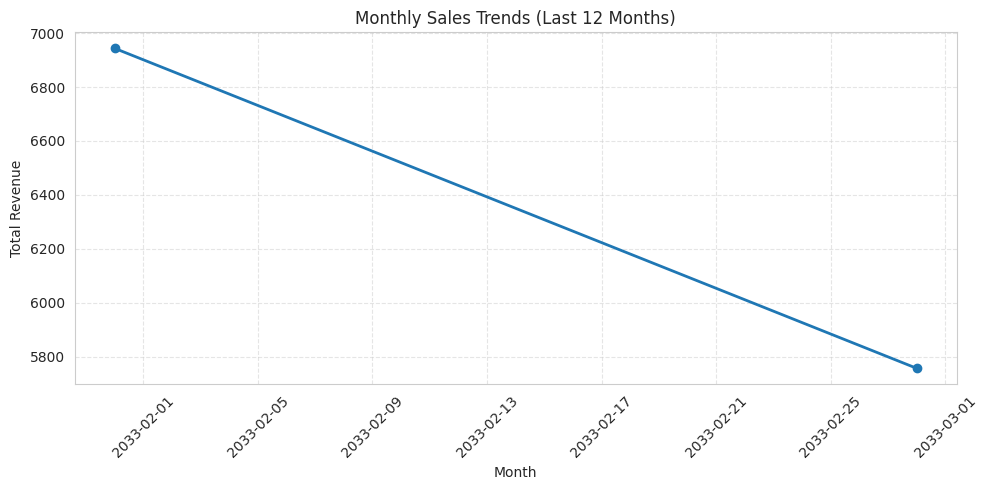

In [335]:
# Ensure Date is datetime
full_data['Date'] = pd.to_datetime(full_data['Date'])

# Filter last 12 months
last_year_data = full_data[
    full_data['Date'] >= full_data['Date'].max() - pd.DateOffset(years=1)
]

# Monthly aggregation (Month-End)
monthly_sales = (
    last_year_data
    .set_index('Date')
    .resample('ME')
    ['Calculated_Revenue']
    .sum()
)

plt.figure(figsize=(10, 5))

plt.plot(
    monthly_sales.index,
    monthly_sales.values,
    marker='o',
    linewidth=2
)

plt.title('Monthly Sales Trends (Last 12 Months)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
